# Fintech545 Assignment3

## October 1, 2022

In [59]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from scipy.stats import shapiro
import random

## Problem 1
Calculate and compare the expected value and standard deviation of price at time $t(P_{t})$, given each of the 3 types of price returns, assuming $r_{t} - N(0, \sigma^2)$. Simulate each return equation using $r_{t} - N(0, \sigma^2)$ and show the mean and standard deviation match your expectations.

### 1.1 Calculate the mean and variance theoratically 

1. Classical Brownian Motion

$P_{t} = P_{t-1} + r_{t}$

$P_{t} = P_{0} + \sum r_{i}$

$E(P_{t}) = E(P_{0} + \sum r_{i})$

$E(P_{t}) = P_{0}$ 

$var(P_{1}) = var(P_{0} + r_{i})$

$var(P_{t}) = t\sigma^2 $

2. Arithmetric Return System

$P_{t} = P_{t-1}(1+r_{t})$

$E(P_{t}) = E(P_{t-1}+ P_{t-1}r_{t})$

$E(P_{t}) = E(P_{t-1})$

$E(P_{t}) = P_{t-1}$

$var(P_{t}) = var(P_{t-1}+ P_{t-1}r_{t})$

$var(P_{t}) = P_{t-1}^2\sigma^2$

3. Geometric Brownian Motion

$ln(P_{t}) = ln(P_{t-1})+r_{t}$

$E(ln(P_{t})) = E(ln(P_{t-1})+r_{t})$

$E(ln(P_{t})) = E(ln(P_{t-1}))$

$E(ln(P_{t})) = ln(P_{0})$

$var(ln(P_{1})) = var(ln(P_{0})+r_{t})$

$var(ln(P_{1})) = \sigma^2$

$var(ln(P_{t})) = t\sigma^2$

### 1.2 Do the simulation

#### Implement the simulation functions for 3 types of price returns. Return the expected value and variance of simulations.

In [60]:
def sim_CBM(t,P0,var,sim):
    result = []
    start = P0
    for _ in range(sim):
        for i in range(t):
            start+=np.random.normal(0,np.sqrt(var))
        result.append(start)
        start = P0
    return (np.sum(result)/len(result), np.var(result))
def sim_ARS(t,P0,sigma,sim):
    result = []
    start = P0
    for _ in range(sim):
        start *= (1+np.random.normal(0,np.sqrt(var)))
        result.append(start)
        start = P0
    return (np.sum(result)/len(result), np.var(result))
def sim_GBM(t,P0,sigma,sim):
    result = []
    start = np.log(P0)
    for _ in range(sim):
        for i in range(t):
            start+=np.random.normal(0,np.sqrt(var))
        result.append(start)
        start = np.log(P0)
    return (np.sum(result)/len(result), np.var(result))

#### Compare the simulation results and theoratically results

In [61]:
t = 100
P0= 100
var = 0.01
sim = 10000
print("The expectations of simulated and theoratical Classical Brownian Motion are", [sim_CBM(t,P0,var,sim)[0], P0])
print("The variance of simulated and theoratical Classical Brownian Motion are", [sim_CBM(t,P0,var,sim)[1], t*var])
print("The expectations of simulated and theoratical Arithmetric Return System are", [sim_ARS(t,P0,var,sim)[0], P0])
print("The variance of simulated and theoratical Arithmetric Return System are", [sim_ARS(t,P0,var,sim)[1], P0**2*var])
print("The expectation of simulated and theoratical Geometric Brownian Motion are", [sim_GBM(t,P0,var,sim)[0], np.log(P0)])
print("The variance of simulated and theoratical Geometric Brownian Motion are", [sim_GBM(t,P0,var,sim)[1], t*var])

The expectations of simulated and theoratical Classical Brownian Motion are [100.0051898884819, 100]
The variance of simulated and theoratical Classical Brownian Motion are [0.9986879313439958, 1.0]
The expectations of simulated and theoratical Arithmetric Return System are [100.04759162793532, 100]
The variance of simulated and theoratical Arithmetric Return System are [99.40830591599008, 100.0]
The expectation of simulated and theoratical Geometric Brownian Motion are [4.616024282093369, 4.605170185988092]
The variance of simulated and theoratical Geometric Brownian Motion are [0.968106451236245, 1.0]


#### The results of the simulation and theoratical calculations matched.

## Problem 2
Implement a function similar to the "return_calculate()" in this week's code. Allow the user to specify the method of return calculation.

Use INTC.csv. Calculate the arithmetic returns for INTC. Remove the mean from the series so that the mean(INTC)=0

Calculate VaR
    1. Using a normal distribution.
    2. Using a normal distribution with an Exponentially Weighted variance ($\lambda = 0.94$)
    3. Using a MLE fitted T distribution.
    4. Using a Historic Simulation.

Compare the 4 values. Look at the empirical distribution of returns, in sample.

Download from Yahoo! Finance the prices since the end of the data in the CSV file(about 3 months). Look the empirical distribution of returns, out of sample.

Discuss the ability of these models to describe the risk in this stock

#### Implement "return_calculate()"

In [62]:
def return_calculate(price, method="DISCRETE"):
    price = price.pct_change().dropna()
    if method == "DISCRETE":
        return price 
    elif method == "LOG":
        return np.log(price)

#### Read INTC data

In [63]:
data = pd.read_csv("INTC.csv")
data

,Date,INTC
0,9/27/2021,52.915421
1,9/28/2021,52.276489
2,9/29/2021,51.782768
3,9/30/2021,51.579464
4,10/1/2021,52.140957
...,...,...
166,5/24/2022,41.253529
167,5/25/2022,41.778233
168,5/26/2022,43.045437
169,5/27/2022,44.104744


#### Calculate the arithmetic returns for INTC and remove the mean

In [64]:
returns = return_calculate(data['INTC'])
returns = returns - np.mean(returns)
returns

1     -0.011228
2     -0.008598
3     -0.003080
4      0.011732
5     -0.006395
         ...   
166   -0.007011
167    0.013565
168    0.031178
169    0.025455
170   -0.002072
Name: INTC, Length: 170, dtype: float64

### 1. Calculate VaR using a normal distribution

In [65]:
sim1 = np.random.normal(0,np.std(returns),size=10000)
-np.percentile(sim1,5)

0.03592470271112527

### 2. Calculate VaR using a normal distribution with an Exponentially Weighted variance (𝜆=0.94)

In [66]:
def expo_weighted_cov(data,lam):
    weight = np.zeros(170)
    t = len(data)
    for i in range(t):
        weight[t-1-i]  = (1-lam)*lam**i
    weight = weight/sum(weight)
    norm_data = data - data.mean()
    return norm_data.T @ (np.diag(weight) @ norm_data)
var = expo_weighted_cov(returns,0.94)
sim2 = np.random.normal(0,np.sqrt(var),size=10000)
-np.percentile(sim2,5)

0.03931295126922911

### 3. Calculate VaR using a MLE fitted T distribution

In [67]:
from scipy import stats
from scipy.optimize import minimize 
def MLE_T(p):
   return -1*np.sum(stats.t.logpdf(returns, df=p[0], loc = p[1],scale=p[2])) 
constraints=({"type":"ineq", "fun":lambda x: x[0]-1}, 
                 {"type":"ineq", "fun":lambda x: x[2]})
df, loc, scale = minimize(MLE_T, x0 = (10,np.mean(returns),np.std(returns)),constraints=constraints).x

sim3= stats.t(df=df, scale=scale).rvs(10000)
-np.percentile(sim3,5)

0.03318426205106343

### 4. Calculate VaR using a Historic Simulation

In [68]:
-np.percentile(returns,5)

0.029574903865632305

#### Draw historical distributions

/var/folders/1n/6zcygvs12455myprvytb14680000gn/T/ipykernel_12623/1985991635.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sim1, ax = ax, hist=False, label='normal')
/var/folders/1n/6zcygvs12455myprvytb14680000gn/T/ipykernel_12623/1985991635.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe

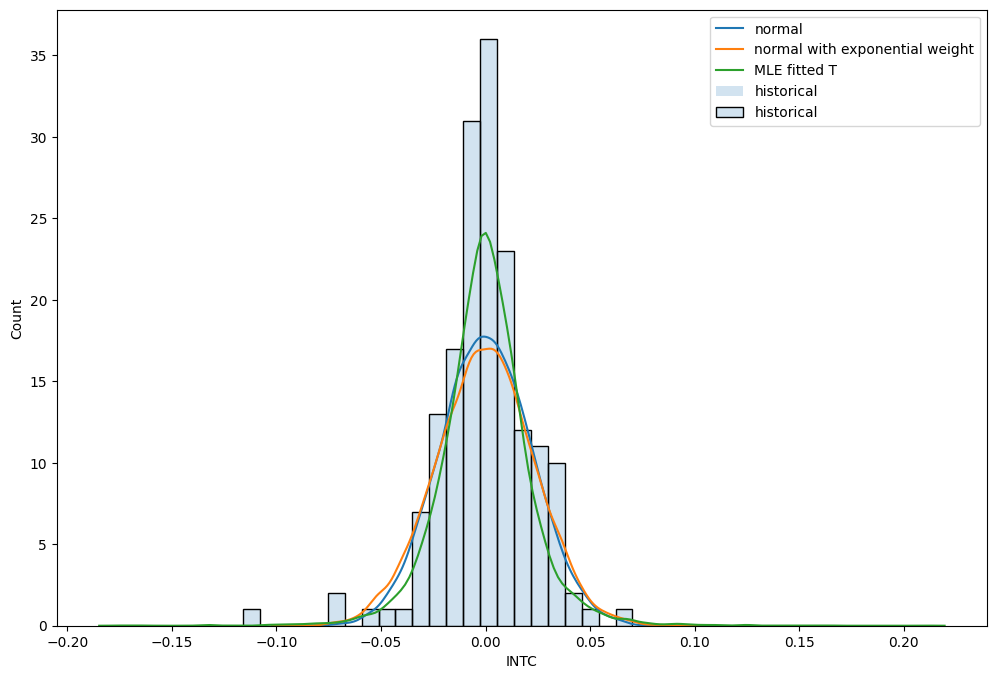

In [69]:
f, ax = plt.subplots(1, 1, figsize =(12,8))
sns.histplot(returns, ax = ax, label='historical', alpha = 0.2)
sns.distplot(sim1, ax = ax, hist=False, label='normal')
sns.distplot(sim2, ax = ax, hist=False, label='normal with exponential weight')
sns.distplot(sim3, ax = ax, hist=False, label='MLE fitted T')
ax.legend()

None of them fits very well with the historical data. The best fit distribution is MLE fitted T.

#### Download data from Yahoo Finance

In [70]:
import yfinance as yf
intc_df = yf.download('INTC', start='2022-05-31', end='2022-09-01', progress=False)
f_returns = return_calculate(intc_df["Adj Close"])
f_returns -= f_returns.mean()

#### Draw future distributions

/var/folders/1n/6zcygvs12455myprvytb14680000gn/T/ipykernel_12623/1805923369.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sim1, ax = ax, hist=False, label='normal')
/var/folders/1n/6zcygvs12455myprvytb14680000gn/T/ipykernel_12623/1805923369.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe

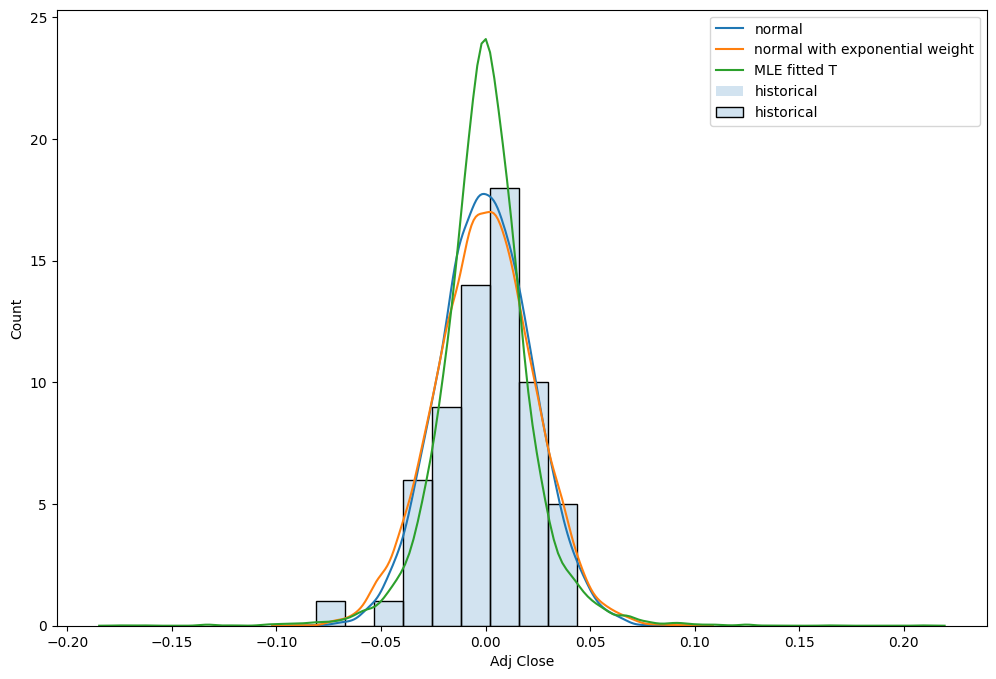

In [71]:
f, ax = plt.subplots(1, 1, figsize = (12,8))
sns.histplot(f_returns, ax = ax, label='historical', alpha = 0.2)
sns.distplot(sim1, ax = ax, hist=False, label='normal')
sns.distplot(sim2, ax = ax, hist=False, label='normal with exponential weight')
sns.distplot(sim3, ax = ax, hist=False, label='MLE fitted T')
ax.legend()

The normal and the normal with exponential weight distributions both fit the future distribution.

## Problem 3
Using Portfolio.csv and DailyPrices.csv. Assume the expected return on all stocks is 0.

This file contains the stock holdings of 3 portfolios. You own each of these portfolios. Calculate the VaR of each portfolio as well as your total VaR(VaR of the total holdings).

Discuss your methods, why you chose those methods, and your results.

#### Since both Delta Normal VaR and Normal Monte Carlo VaR require the data being normality, we should perform the normality test first.

In [72]:
p = pd.read_csv("Portfolio.csv")
dp = pd.read_csv("DailyPrices.csv")
s = 0
for i in p[p["Portfolio"]=="A"]['Stock']:
    if shapiro(return_calculate(dp.loc[:,i]))[1]>0.05:
        s+=1
print("the percentage of portfolio A that is normaly distributed is:", s/len(p[p["Portfolio"]=="A"]))
s=0
for i in p[p["Portfolio"]=="B"]['Stock']:
    if shapiro(return_calculate(dp.loc[:,i]))[1]>0.05:
        s+=1
print("the percentage of portfolio B that is normaly distributed is:", s/len(p[p["Portfolio"]=="B"]))
s=0
for i in p[p["Portfolio"]=="C"]['Stock']:
    if shapiro(return_calculate(dp.loc[:,i]))[1]>0.05:
        s+=1
print("the percentage of portfolio C that is normaly distributed is:", s/len(p[p["Portfolio"]=="C"]))

the percentage of portfolio A that is normaly distributed is: 0.5277777777777778
the percentage of portfolio B that is normaly distributed is: 0.46875
the percentage of portfolio C that is normaly distributed is: 0.59375


#### Since we only have half of the total stocks that are normality distributed, the historical VaR should be used.

#### Portfolio A historical VaR

89.0951498747323


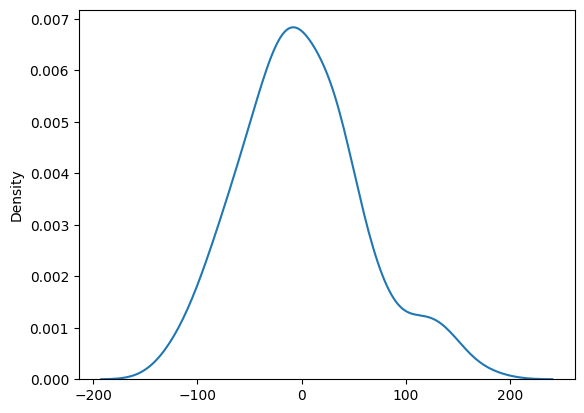

In [73]:
portA_sim = []
for _ in range(200):
    value = 0
    for i in p[p["Portfolio"]=="A"]['Stock']:
        cp = dp.loc[:,i].iloc[-1]
        returns = return_calculate(dp.loc[:,i])
        value+=cp*(1+random.choice(list(returns)))
    portA_sim.append(value)
portA_sim -= np.mean(portA_sim)
sns.kdeplot(portA_sim)
print(-np.percentile(portA_sim,5))

#### Portfolio B historical VaR

118.3693363523469


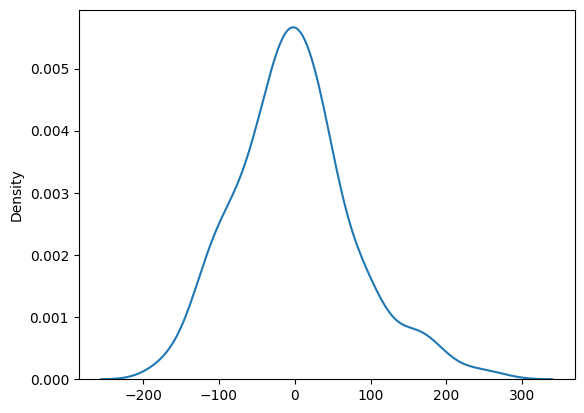

In [74]:
portB_sim = []
for _ in range(200):
    value = 0
    for i in p[p["Portfolio"]=="B"]['Stock']:
        cp = dp.loc[:,i].iloc[-1]
        returns = return_calculate(dp.loc[:,i])
        value+=cp*(1+random.choice(list(returns)))
    portB_sim.append(value)
portB_sim -= np.mean(portB_sim)
sns.kdeplot(portB_sim)
print(-np.percentile(portB_sim,5))

#### Portfolio C historical VaR

113.03743521224605


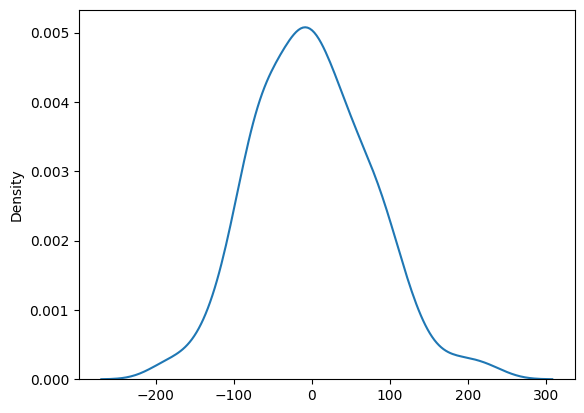

In [75]:
portC_sim = []
for _ in range(200):
    value = 0
    for i in p[p["Portfolio"]=="C"]['Stock']:
        cp = dp.loc[:,i].iloc[-1]
        returns = return_calculate(dp.loc[:,i])
        value+=cp*(1+random.choice(list(returns)))
    portC_sim.append(value)
portC_sim -= np.mean(portC_sim)
sns.kdeplot(portC_sim)
print(-np.percentile(portC_sim,5))

#### Portfolio total historical VaR

202.7390290845502


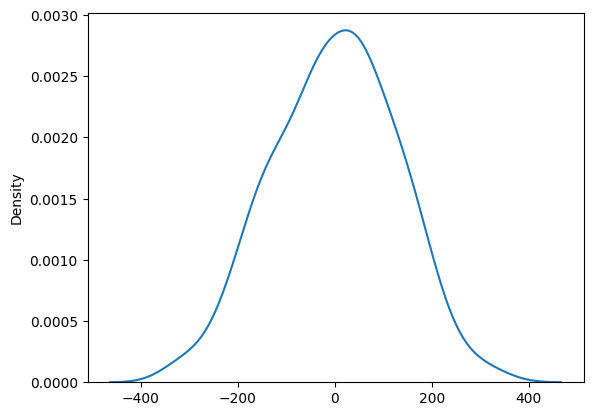

In [76]:
port_sim = []
for _ in range(200):
    value = 0
    for i in p['Stock']:
        cp = dp.loc[:,i].iloc[-1]
        returns = return_calculate(dp.loc[:,i])
        value+=cp*(1+random.choice(list(returns)))
    port_sim.append(value)
port_sim -= np.mean(port_sim)
sns.kdeplot(port_sim)
print(-np.percentile(port_sim,5))